토치 RNN 튜토리얼이다.  
  
https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html  
  

In [46]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

In [47]:
def find_files(path):
  return glob.glob(path)

In [48]:
print(find_files('/content/drive/MyDrive/torch_tutorial/data/names/*.txt'))
source = '/content/drive/MyDrive/torch_tutorial/data/names/*.txt'

['/content/drive/MyDrive/torch_tutorial/data/names/Russian.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Polish.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Chinese.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Italian.txt', '/content/drive/MyDrive/torch_tutorial/data/names/French.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Japanese.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Spanish.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Korean.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Dutch.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Scottish.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Portuguese.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Arabic.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Czech.txt', '/content/drive/MyDrive/torch_tutorial/data/names/English.txt', '/content/drive/MyDrive/torch_tutorial/data/names/Greek.txt', '/content/drive/MyDrive/torch_tutorial/data/

In [49]:
import unicodedata
import string

In [50]:
all_letters = string.ascii_letters + ".,;"
n_letters = len(all_letters)

In [51]:
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
#일단 적었다.
def unicode_to_ascii(s):
  return ''.join(
       c for c in unicodedata.normalize('NFD', s)
       if unicodedata.category(c) != 'Mn' and c in all_letters
  )

In [52]:
print(unicode_to_ascii('Ślusàrski'))

Slusarski



여기까지 설명. 




In [53]:
category_lines = {}
all_categories = []

In [54]:
def read_lines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicode_to_ascii(line) for line in lines]

In [55]:
for filename in find_files(source):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = read_lines(filename)
  category_lines[category] = lines

In [56]:
n_categories = len(all_categories)

In [57]:
print(n_categories)

18


In [58]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [59]:
print(category_lines['Italian'][:500])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni', 'Abatescianni', 'Abba', 'Abbadelli', 'Abbascia', 'Abbatangelo', 'Abbatantuono', 'Abbate', 'Abbatelli', 'Abbaticchio', 'Abbiati', 'Abbracciabene', 'Abbracciabeni', 'Abelli', 'Abello', 'Abrami', 'Abramo', 'Acardi', 'Accardi', 'Accardo', 'Acciai', 'Acciaio', 'Acciaioli', 'Acconci', 'Acconcio', 'Accorsi', 'Accorso', 'Accosi', 'Accursio', 'Acerbi', 'Acone', 'Aconi', 'Acqua', 'Acquafredda', 'Acquarone', 'Acquati', 'Adalardi', 'Adami', 'Adamo', 'Adamoli', 'Addario', 'Adelardi', 'Adessi', 'Adimari', 'Adriatico', 'Affini', 'Africani', 'Africano', 'Agani', 'Aggi', 'Aggio', 'Agli', 'Agnelli', 'Agnellutti', 'Agnusdei', 'Agosti', 'Agostini', 'Agresta', 'Agrioli', 'Aiello', 'Aiolfi', 'Airaldi', 'Airo', 'Aita', 'Ajello', 'Alagona', 'Alamanni', 'Albanesi', 'Albani', 'Albano', 'Alberghi', 'Alberghini', 'Alberici', 'Alberighi', 'Albero', 'Albini', 'Albricci', 'Albrici', 'Alcheri', 'Aldebrandi', 'Alderisi', 'Alduino', 'Alemagna', 'Alep

In [60]:
print(category_lines['Korean'][:125])

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha', 'Chang', 'Chi', 'Chin', 'Cho', 'Choe', 'Choi', 'Chong', 'Chou', 'Chu', 'Chun', 'Chung', 'Chweh', 'Gil', 'Gu', 'Gwang', 'Ha', 'Han', 'Ho', 'Hong', 'Hung', 'Hwang', 'Hyun', 'Jang', 'Jeon', 'Jeong', 'Jo', 'Jon', 'Jong', 'Jung', 'Kang', 'Kim', 'Ko', 'Koo', 'Ku', 'Kwak', 'Kwang', 'Lee', 'Li', 'Lim', 'Ma', 'Mo', 'Moon', 'Nam', 'Ngai', 'Noh', 'Oh', 'Pae', 'Pak', 'Park', 'Ra', 'Rhee', 'Rheem', 'Ri', 'Rim', 'Ron', 'Ryom', 'Ryoo', 'Ryu', 'San', 'Seo', 'Seok', 'Shim', 'Shin', 'Shon', 'Si', 'Sin', 'So', 'Son', 'Song', 'Sook', 'Suh', 'Suk', 'Sun', 'Sung', 'Tsai', 'Wang', 'Woo', 'Yang', 'Yeo', 'Yeon', 'Yi', 'Yim', 'Yoo', 'Yoon', 'You', 'Youj', 'Youn', 'Yu', 'Yun']


이름들을 이제 텐서로 변경한다.  

Now that we have all the names organized, we need to turn them into Tensors to make any use of them.

To represent a single letter, we use a “one-hot vector” of size <1 x n_letters>.  
 A one-hot vector is filled with 0s except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.  

하나의 letter를 "원-핫 벡터"를 써서 표현할껀데, 
그니까 해당 단어에 1 나머지는 0으로 표현  

To make a word we join a bunch of those into a 2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes everything is in batches - we’re just using a batch size of 1 here.

In [61]:
import torch

In [62]:
# Find letter index from all_letters, e.g. "a" = 0
# 모든 단어로부터 letter의 인덱스를 찾는다.
def letter_to_index(letter):
  return all_letters.find(letter)

In [63]:
def letter_to_tensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letter_to_index(letter)] = 1 #이걸 왜 따로 뺏지? 자주사용하나?
  return tensor
# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
# 1 x n개의 letter를 전환하는 테스팅? 이란 뜻인가?

In [64]:
# Turn a line into a <line_length x 1 x n_letters>, or an array of one-hot letter vectors
# Line length와 n letter를 곱한것 그리고 원핫 letter 벡터를 곱한 것 ?
def line_to_tensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letter_to_index(letter)] = 1
  return tensor

In [65]:
print(letter_to_tensor('J'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])


In [66]:
print(line_to_tensor('Jones').size())

torch.Size([5, 1, 55])


위의 예시는 J가 원핫 코딩이 잘 된것을 확인할 수 있고  
아래 예시는 

In [67]:
import torch.nn as nn

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def init_hidden(self):
    return torch.zeros(1, self.hidden_size)

In [68]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [69]:
input = letter_to_tensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [70]:
input = line_to_tensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9055, -2.8046, -2.9079, -2.8762, -2.8717, -2.8670, -2.9314, -2.9011,
         -2.8567, -2.9890, -2.8780, -2.9473, -2.8944, -2.8828, -2.9512, -2.8288,
         -2.9236, -2.8281]], grad_fn=<LogSoftmaxBackward>)


In [71]:
def category_from_output(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

In [72]:
print(category_from_output(output))

('Polish', 1)


In [73]:
import random

In [74]:
def random_choice(l):
  return l[random.randint(0, len(l) -1)]

In [75]:
def random_train_example():
  category = random_choice(all_categories)
  line = random_choice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = line_to_tensor(line)
  return category, line, category_tensor, line_tensor

In [76]:
for i in range(10):
  category, line, category_tensor, line_tensor = random_train_example()
  print('category =', category, '/ line =', line)

category = Arabic / line = Atiyeh
category = Spanish / line = Medina
category = Korean / line = Chin
category = German / line = Sponaugle
category = Arabic / line = Hakimi
category = Chinese / line = Yong
category = Italian / line = Acqua
category = Polish / line = Zuraw
category = Portuguese / line = Henriques
category = German / line = Kiefer


In [77]:
criterion = nn.NLLLoss()

In [78]:
learning_rate = 0.005
# If you set this too high, it might explode. If too low, it might not learn
#그럼 얼마로 해야해?

In [79]:
def train(category_tensor, line_tensor):
  hidden = rnn.init_hidden()
  rnn.zero_grad()
  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)
  loss = criterion(output, category_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha =- learning_rate)
  
  return output, loss.item()

In [81]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000
current_loss = 0
all_losses = []

In [82]:
def time_since(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)

In [83]:
start = time.time()

In [84]:
for iter in range(1, n_iters + 1):
  category, line, category_tensor, line_tensor = random_train_example()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

  if iter % print_every == 0:
    guess, guess_i = category_from_output(output)
    correct = 'V' if guess == category else 'X (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

  if iter % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0

5000 5% (3m 58s) 2.5434 Dzhahaya / Japanese X (Russian)
10000 10% (4m 2s) 2.6070 Descoteaux / Polish X (French)
15000 15% (4m 7s) 4.1140 Danich / Arabic X (Russian)
20000 20% (4m 12s) 0.6498 Gil / Korean V
25000 25% (4m 16s) 0.3088 Azhiganov / Russian V
30000 30% (4m 21s) 1.6604 Kwong / Korean X (Chinese)
35000 35% (4m 25s) 1.9692 Trafford / French X (English)
40000 40% (4m 30s) 1.5788 Ruiz / Spanish V
45000 45% (4m 34s) 1.9617 Gillies / Greek X (English)
50000 50% (4m 39s) 0.8562 Fernandes / Portuguese V
55000 55% (4m 44s) 2.9197 Nifterick / Russian X (Dutch)
60000 60% (4m 48s) 0.5856 Zubizarreta / Spanish V
65000 65% (4m 53s) 3.9796 Doi / Korean X (Japanese)
70000 70% (4m 57s) 0.4672 Ko / Korean V
75000 75% (5m 2s) 0.3126 Gwang / Korean V
80000 80% (5m 6s) 0.3106 Yamagata / Japanese V
85000 85% (5m 11s) 1.6514 Farrell / English X (Irish)
90000 90% (5m 16s) 0.8250 Hamilton / Scottish V
95000 95% (5m 20s) 2.4048 Abreu / Portuguese X (Spanish)
100000 100% (5m 25s) 1.4037 Brodeur / Germa

In [85]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

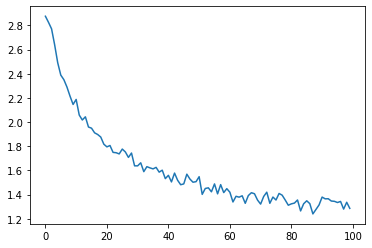

In [86]:
plt.figure()
plt.plot(all_losses)

In [87]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

In [88]:
# Just return an output given a line
def evaluate(line_tensor):
  hidden = rnn.init_hidden()
  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

In [89]:
# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
  category, line, category_tensor, line_tensor = random_train_example()
  output = evaluate(line_tensor)
  guess, guess_i = category_from_output(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

In [90]:
#Normalize by dividing every row by its sum
for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

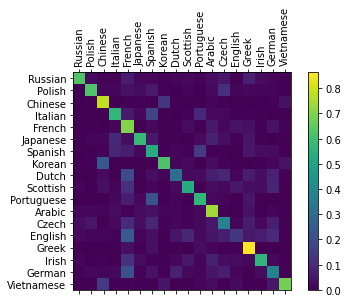

In [93]:
#Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [94]:
def predict(input_line, n_predictions=3):
  print('\n> %s' % input_line)
  with torch.no_grad():
    output = evaluate(line_to_tensor(input_line))

    #get top n categories
    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print('(%.2f) %s' & (value, all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])

In [98]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

In [99]:
predict('Dovesky')


> Dovesky
(-0.66) Russian
(-0.89) Czech
(-3.68) English


In [101]:
predict('Jackson')


> Jackson
(-0.96) Scottish
(-1.35) Greek
(-1.77) French
